# R$_{\rm high}$ & R$_{\rm low}$ model in Moscibrodzka+16

$T_i/T_e = \frac{\beta^2\,R_{\rm high}}{1+\beta^2} + \frac{R_{\rm low}}{1+\beta^2}$

# exponential model in Anantua+20
$T_e/T_{\rm tot} = f\,e^{-\beta/\beta_{c}}$ , where $T_{\rm tot} = T_e + T_i$

In [26]:
import numpy as np

def TeoTi_mos(beta, Rhigh=1, Rlow=1):
    return (1+beta*beta) / (beta*beta*Rhigh + Rlow)

def TeoTi_ana(beta,f=0.5,beta_crit=1.):
    #return f*np.exp(-beta/beta_crit)
    return f*np.exp(-beta/beta_crit)/(1.-f*np.exp(-beta/beta_crit))

In [27]:
beta = np.logspace(-2,1,200)

TeoTi_Rh1   = TeoTi_mos(beta,Rhigh=1)
TeoTi_Rh20  = TeoTi_mos(beta,Rhigh=20)
TeoTi_Rh40  = TeoTi_mos(beta,Rhigh=40)
TeoTi_Rh80  = TeoTi_mos(beta,Rhigh=80)
TeoTi_Rh160 = TeoTi_mos(beta,Rhigh=160)

TeoTi_f05bc1   = TeoTi_ana(beta,f=0.5,beta_crit=1.)
TeoTi_f01bc1   = TeoTi_ana(beta,f=0.1,beta_crit=1.)
TeoTi_f05bc033 = TeoTi_ana(beta,f=0.5,beta_crit=0.33)

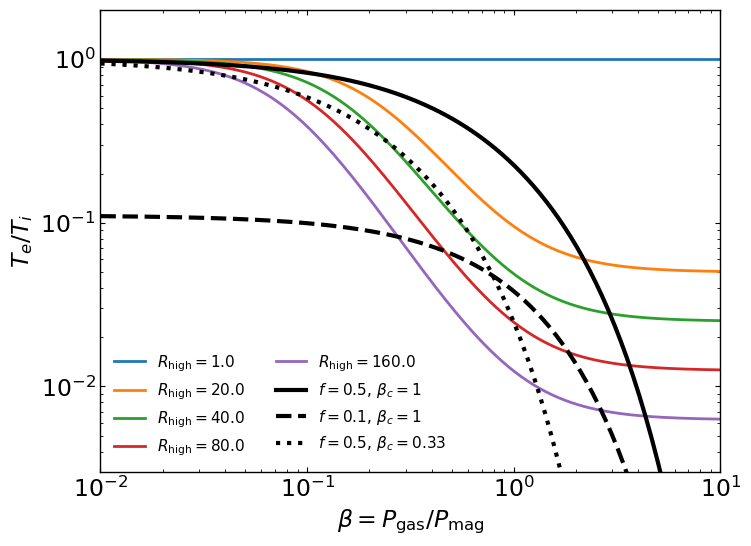

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots()

ax.plot(beta,TeoTi_Rh1, lw=2, label=r'$R_{\rm high}=1.0$')
ax.plot(beta,TeoTi_Rh20, lw=2, label=r'$R_{\rm high}=20.0$')
ax.plot(beta,TeoTi_Rh40, lw=2, label=r'$R_{\rm high}=40.0$')
ax.plot(beta,TeoTi_Rh80, lw=2, label=r'$R_{\rm high}=80.0$')
ax.plot(beta,TeoTi_Rh160, lw=2, label=r'$R_{\rm high}=160.0$')

ax.plot(beta,TeoTi_f05bc1, lw=3, color='black', label=r'$f=0.5,\, \beta_c=1$')
ax.plot(beta,TeoTi_f01bc1, lw=3, ls='--', color='black', label=r'$f=0.1,\, \beta_c=1$')
ax.plot(beta,TeoTi_f05bc033, lw=3, ls=':', color='black', label=r'$f=0.5,\, \beta_c=0.33$')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-2,1e1)
ax.set_ylim(3e-3,2)

ax.set_xlabel(r'$\beta = P_{\rm gas}/P_{\rm mag}$')
ax.set_ylabel(r'$T_e/T_i$')

ax.legend(loc='best', ncol=2, fontsize=11, frameon=False)